# FIT5196 Assessment 2
## Task : Data Cleansing
#### Student Name: Harshavardhan Reddy Mallypally

Date: 02/10/2018

Juypter version 5.5.0

Environment: Python 3.6.0 and Anaconda 5.2.0 (64-bit)

Packages used:
* Pandas 
* matplot
* Seaborn
* Navie Bayes from sklearn package
* numpy
* norm from scipy.stats package


# 1. Introduction to Data cleansing:

Data cleansing is an iterative process. The first step of the cleansing process is data auditing. In this step, we identify the types of anomalies that reduce the data quality.  Data auditing is about programmatically checking the data using some validation rules that are pre-specified, and then creating a report of the quality of the data and its problems. We often apply some statistical tests in this step for examining the data.
Data Anomalies can be classified at a high level into three categories:

1. **Syntactic Anomalies**: 

2. **Semantic Anomalies**: 

3. **Coverage Anomalies**: 
decrease the amount of entities and entity properties from the mini-world that are represented in the data collection. Coverage anomalies are categorized as: missing values and missing tuples.


### 1.1 Importing Required Packages

In [1]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from scipy.stats import norm
from sklearn.naive_bayes import GaussianNB

### 1.2 Loading the Drone data csv file as Dataframe. 

In [2]:
# reading the data
Drone_data = pd.read_csv("29424143.csv")
# Shows glipmse of the data
Drone_data.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID5339642557,1.0,1.0,30.143,1.0,50.0,-38.532296,145.046106,-38.363338,147.572334,221.033,2018-04-26,03:31:12,224.38,7:15:34,174.12
1,ID5815082582,NaN,1.0,17.397,8.0,20.0,-38.129209,144.175086,-38.009586,147.773925,315.649,2018-05-23,02:23:57,249.92,6:33:52,255.05
2,ID1185924383,1.0,0.0,24.605,56.0,1.0,-36.944105,144.659460,-38.435770,144.897623,167.368,2018-02-22,00:47:28,171.59,3:39:03,130.97
3,ID5298612264,1.0,1.0,12.460,28.0,4.0,-36.586243,144.327389,-38.770686,147.942019,400.622,2018-05-14,16:20:04,401.02,23:01:05,167.84
4,ID1786439932,NaN,0.0,11.279,40.0,58.0,-36.844829,145.153432,-36.840708,145.771079,55.025,2018-06-21,07:03:12,61.09,8:04:17,89.23


### 1.3 Understanding the Drone data in Dataframe using info() command

This data is about the drones deliverying the packages across the victoria. Its has 16 columns and 37503 rows. Some of the columns have missing values that can be found by looking at the output from the .info() command on dataframe.

In [3]:
# Prints the columns and their datatype and any missing values in columns.
Drone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37503 entries, 0 to 37502
Data columns (total 16 columns):
Id                       37479 non-null object
Drone Type               37493 non-null float64
Post Type                37483 non-null float64
Package Weight           37503 non-null float64
Origin Region            37493 non-null float64
Destination Region       37493 non-null float64
Origin Latitude          37503 non-null float64
Origin Longitude         37503 non-null float64
Destination Latitude     37503 non-null float64
Destination Longitude    37503 non-null float64
Journey Distance         37503 non-null float64
Departure Date           37503 non-null object
Departure Time           37503 non-null object
Travel Time              37463 non-null float64
Delivery Time            37503 non-null object
Delivery Fare            37473 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.6+ MB


### 1.4 Understanding the numerical data in dataframe
Using describe() on dataframe we can find that how the data is distributed in each column. 

In [4]:
# print all statictal data of every numerical column
Drone_data.describe()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
count,37493.000000,37483.000000,37503.000000,37493.000000,37493.000000,37503.000000,37503.000000,37503.000000,37503.000000,37503.000000,37463.000000,37473.000000
mean,1.699224,0.297602,22.683268,30.014909,30.037740,-37.734959,145.477795,-37.730947,145.468884,215.289185,206.567101,160.882739
std,0.778271,0.457209,10.360222,17.057747,17.073488,1.905936,6.933525,1.897005,6.937635,112.577098,106.150366,60.429067
min,1.000000,0.000000,5.000000,1.000000,1.000000,-39.005998,-148.346462,-39.006377,-147.663963,0.269000,7.200000,75.760000
25%,1.000000,0.000000,13.780000,15.000000,15.000000,-38.425663,144.182754,-38.417080,144.171718,127.956500,124.735000,129.100000
50%,2.000000,0.000000,22.474000,30.000000,30.000000,-37.788792,145.690317,-37.791929,145.684804,203.545000,193.840000,154.310000
75%,2.000000,1.000000,31.458000,45.000000,45.000000,-37.100586,147.151859,-37.095141,147.150549,291.016500,276.630000,183.000000
max,3.000000,1.000000,49.998000,59.000000,59.000000,38.992066,148.450819,38.855810,148.450819,556.434000,546.800000,1211.100000


### 1.5 Understanding the Relationship between all the columns 

Here, I found the interesting relationships those are:
   * Drone Type has some relation with Travel Time and Delivery Fare.
   * Delivery Fare has some relation with Travel time, Journey Distance, Package weight, Post type and Drone Type.

Below diagram helps me to find the best approach to address missing errors in the data

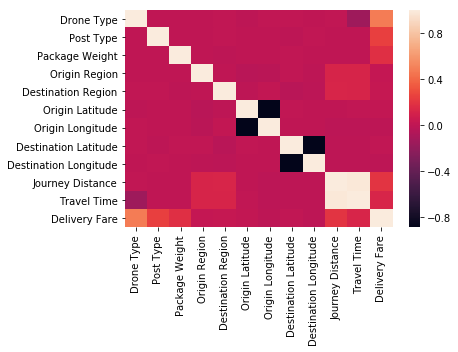

In [5]:
# corr holds the correlation matrix of all columns in dataframe
corr = Drone_data.corr()
# visulaizing them to diffe
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## 1.6 Understanding more about the data by ploting actual realtions

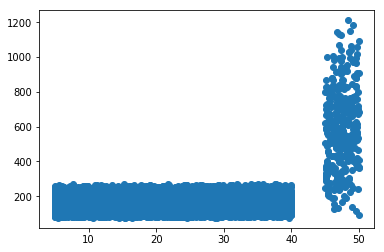

In [6]:
plt.scatter(Drone_data['Package Weight'],Drone_data['Delivery Fare'])
plt.show()

From above plot, we can understand that Delivery Fare relation changes with Package weight as package weight is greater than 40.

From the below plot, It is clear that if package weight greater than 40 Delivery Fare depends on the journey distance
and if package weight is less than 40 then based on drone type and journey distance we can estimate the delivery fare.

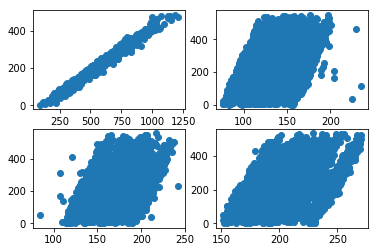

In [7]:
fig = plt.figure()
plt.subplot(2,2,1)
tem1_df = Drone_data[Drone_data['Package Weight']>40]
plt.scatter(tem1_df['Delivery Fare'],tem1_df['Journey Distance'])
plt.subplot(2,2,2)
tem2_df = Drone_data[(Drone_data['Package Weight']<40)&(Drone_data['Drone Type']==1.0) ]
plt.scatter(tem2_df['Delivery Fare'],tem2_df['Journey Distance'])
plt.subplot(2,2,3)
tem2_df = Drone_data[(Drone_data['Package Weight']<40)&(Drone_data['Drone Type']==2.0) ]
plt.scatter(tem2_df['Delivery Fare'],tem2_df['Journey Distance'])
plt.subplot(2,2,4)
tem2_df = Drone_data[(Drone_data['Package Weight']<40)&(Drone_data['Drone Type']==3.0) ]
plt.scatter(tem2_df['Delivery Fare'],tem2_df['Journey Distance'])
plt.show()

From the above graphs we can see some outliers which has to be address since some of the drone types are wrongly represented.

# 2. **Syntactic Anomalies**: 
describe characteristics concerning the format and values used for representation of the entities. Syntactic anomalies such as: lexical errors, domain format errors, syntactical error and irregularities.

## 2.1 Syntactic Errors in Departure date format

It quite common that dates might have some syntactic errors. Since, The departure column has all dates of 2018 year. I looked into the calender and cross checked any abnormal dates in departure date column.

We all know that month can't be more than the 12. So, The months with greater than 12 has to be replaced. Other than month, day and year are in with in the range.

In [8]:
# Function to find get the months of dates from the departure date column.
def monthchecker(s):
    month = s.split('-')[1]
    return float(month)
# Applied the monthchecker function and stored the months in new column.
Drone_data['month'] = Drone_data['Departure Date'].apply(monthchecker)
# Prints all unique months in month column
print(pd.unique(Drone_data['month']))

[ 4.  5.  2.  6.  3.  7.  1. 14. 17. 18. 23. 13. 28. 22. 19. 20. 25. 21.
 16. 27. 24. 26. 15.]


In [9]:
# Prints first 25 dates with month greater than 12
print(Drone_data[Drone_data['month']>12]['Departure Date'][1:25])

949     2018-14-07
1050    2018-17-06
1190    2018-18-02
1215    2018-23-02
2975    2018-13-07
3037    2018-28-07
3060    2018-17-01
3140    2018-22-03
3222    2018-28-03
3232    2018-14-05
3290    2018-18-02
4520    2018-28-06
4971    2018-19-02
4975    2018-19-06
5052    2018-19-06
5336    2018-20-06
6994    2018-25-04
6995    2018-28-06
7231    2018-13-07
7247    2018-28-06
7323    2018-21-07
7369    2018-16-01
9061    2018-28-03
9153    2018-25-01
Name: Departure Date, dtype: object


Since, we can't impute whatever the values we want in data. Suprisingly, I found that all month greater than 12 has their days less than 12. So, I replaced all months with the days.

Here, months and days are swapped. I swapped them back to clear syntactic error in the dates using dateformatter function.
By using dataformatter I cleared all the month erros in deprature date

In [10]:
# Defined dateformatter function to clear all month error in departure date
def dateformatter(s):
    date_split = s.split('-')
    if int(date_split[1])>12:
        temp = date_split[1]
        date_split[1] = date_split[2]
        date_split[2] = temp
        return ("-").join(date_split)
    else:
        return ("-").join(date_split)

# Applied dateformatter function on the departure column of dataframe to clear month value greater than 12
Drone_data['Departure Date'] = Drone_data['Departure Date'].apply(dateformatter)

# Dropped month column. since we no need of that
Drone_data = Drone_data.drop(columns=['month'])

## 2.2 Syntactic error in Delivery Time and Departure Time cloumns

In [11]:
# Defined timechecker function to check hours format
def timechecker(s):
    time_split = s.split(':')
    return time_split[0]
Drone_data['hours'] = Drone_data['Departure Time'].apply(timechecker)
# Prints all unique values in hours column created above.
print(pd.unique(Drone_data['hours']))

['03' '02' '00' '16' '07' '10' '23' '15' '21' '17' '05' '01' '12' '14'
 '06' '13' '18' '20' '04' '19' '09' '08' '11' '22' '0' '8' '5' '1' '4' '3'
 '2']


From above cell output, we can find out that this hours **[ '0', '8', '5', '1', '4', '3' ]** are also represented as **[ '00', '08', '05', '01', '04', '03' ]** which a kind of syntactical error that has to be overcomed.

Using the below hourcheck function I was able to clear all syntactical errors in both Departure Time and Delivery Time.

In [12]:
# Defined hourscheck function to clear all syntactical error in all rows of delivery time and departure time column.
def hourcheck(s):
    time_split = s.split(':')
    if len(time_split[0])==1:
        time_split[0]='0'+str(time_split[0])
        return (':').join(time_split)
    else:
        return (':').join(time_split)
    
# Applying hourcheck function on Departure Time column
Drone_data['Departure Time'] = Drone_data['Departure Time'].apply(hourcheck)
# Applying hourcheck function on Delivery Time column
Drone_data['Delivery Time'] = Drone_data['Delivery Time'].apply(hourcheck)
# Dropped hours column in the dataframe
Drone_data = Drone_data.drop(columns=['hours'])

## 2.3 Syntactical Errors in Latitude and Longitude

We can find syntactical errors in latitude and longitude by plotting them.

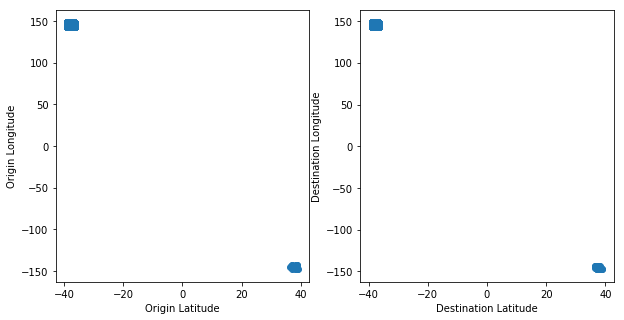

In [13]:
# Ploting the Latitde vs longitude of orgin region
fig = plt.figure(1)
# Subplot to plot two plots 
plt.subplot(1,2,1)
plt.scatter(Drone_data['Origin Latitude'],Drone_data['Origin Longitude'])
plt.xlabel('Origin Latitude')
plt.ylabel('Origin Longitude')

plt.subplot(1,2,2)
plt.scatter(Drone_data['Destination Latitude'],Drone_data['Destination Longitude'])
plt.xlabel('Destination Latitude')
plt.ylabel('Destination Longitude')
fig.set_figheight(5)
fig.set_figwidth(10)

plt.show()

From the above plots, I find the syntactical error in both since the graph should show the 59 regions instead I can see only two clusters.

## 2.3.1 Origin Latitude and Destination Latitude
When I looked at the statstics of origin latitude and destination latitude I found that, max value is posistive. which is completely wrong since latitudes should be negative for a all region because drone delivery distance is upto max of 566km as per the data.

In [14]:
# Origin Latitude and Destination Latitude describe their statstics data
Drone_data[['Origin Latitude', 'Destination Latitude']].describe()

,Origin Latitude,Destination Latitude
count,37503.000000,37503.000000
mean,-37.734959,-37.730947
std,1.905936,1.897005
min,-39.005998,-39.006377
25%,-38.425663,-38.417080
50%,-37.788792,-37.791929
75%,-37.100586,-37.095141
max,38.992066,38.855810


Since the some latitudes in both origin and destination are positive we can remove them by appling the below defined latitudefomatter function.

In [15]:
# Defined latitudeformatter function 
def latitudeformatter(x):
    if x > 0.0:
        return x*(-1)
    else:
        return x
    
# Applied latitudeformatter function on Origin Latitude column
Drone_data['Origin Latitude'] = Drone_data['Origin Latitude'].apply(latitudeformatter)
# Applied latitudeformatter function on Destination Latitude column
Drone_data['Destination Latitude'] = Drone_data['Destination Latitude'].apply(latitudeformatter)

## 2.3.2 Origin Longitude and Destination Longitude

When I looked at the statstics of origin longitude and destination longitude I found that, min value is negative. which is completely wrong since longitude should be positive for a all region because drone delivery distance is upto max of 566km as per the data.

In [16]:
# Origin Latitude and Destination Longitude describe their statstics data
Drone_data[['Origin Longitude', 'Destination Longitude']].describe()

,Origin Longitude,Destination Longitude
count,37503.000000,37503.000000
mean,145.477795,145.468884
std,6.933525,6.937635
min,-148.346462,-147.663963
25%,144.182754,144.171718
50%,145.690317,145.684804
75%,147.151859,147.150549
max,148.450819,148.450819


Since the some longitude in both origin and destination are negative we can remove them by appling the below defined longitudefomatter function.

In [17]:
# defined longitudeformatter function
def longitudeformatter(x):
    if x < 0:
        return x*-1
    else:
        return x

# Applied longitudeformatter function on both Origin Longitude and Destination longitude columns        
Drone_data['Origin Longitude'] = Drone_data['Origin Longitude'].apply(longitudeformatter)
Drone_data['Destination Longitude'] = Drone_data['Destination Longitude'].apply(longitudeformatter)

## 2.3.3 Checking syntactical errors in the Latitude and Longitude columns

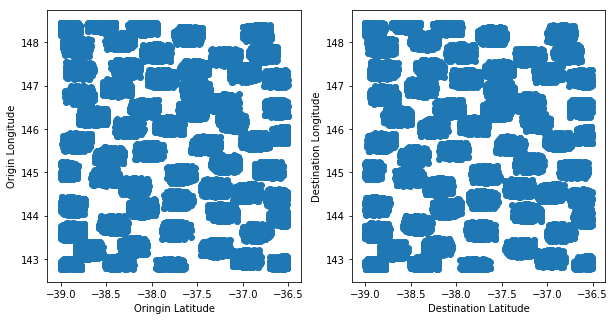

In [18]:
fig = plt.figure(1)
plt.subplot(1,2,1)
plt.scatter(Drone_data['Origin Latitude'],Drone_data['Origin Longitude'])
plt.xlabel('Oringin Latitude')
plt.ylabel('Origin Longitude')

plt.subplot(1,2,2)
plt.scatter(Drone_data['Destination Latitude'],Drone_data['Destination Longitude'])
plt.xlabel('Destination Latitude')
plt.ylabel('Destination Longitude')
fig.set_figheight(5)
fig.set_figwidth(10)


plt.show()

# 3. Semantic errors
hinder the data collection from being a comprehensive and non-redundant representation of the mini-world. These types of anomalies include: Integrity constraint violations, contradictions, duplicates and invalid tuples.

## 3.1 Semantic error in Departure date

We can't easily find semantic erros just like syntactical errors. Cause, They already are in correct format. We need to check for known existing dates. 
For that I used trial and error method like below.

In [19]:
print(Drone_data[Drone_data['Departure Date'] == '2018-02-30']['Departure Date'].any())
print(Drone_data[Drone_data['Departure Date'] == '2018-04-31']['Departure Date'].any())
print(Drone_data[Drone_data['Departure Date'] == '2018-06-31']['Departure Date'].any())

2018-02-30
2018-04-31
2018-06-31


So, result of above shows that there ar this kind of errors that has to be replaced with correct date. We can can't impute any random date into them. So, I thought that day values can be interchange like '30' to 03 just we did for the months. So, im replacing all wrong dates in Departure columns
Eg: '2018-02-30' to '2018-02-03' and soon.

In [20]:
# Replace command replace values in a column of dataframe
Drone_data['Departure Date'].replace({'2018-02-30': '2018-02-03','2018-04-31':'2018-04-13','2018-06-31':'2018-06-13'},inplace=True)

## 3.2 Semantic errors in Origin region and Destination Region

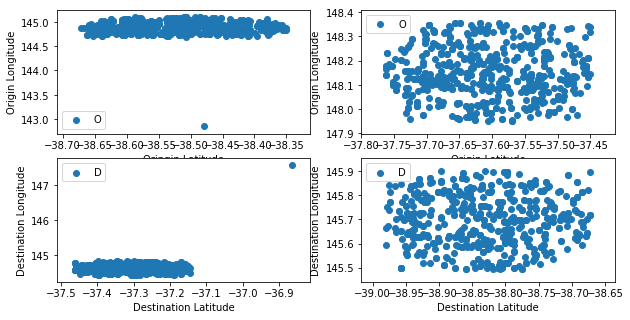

In [21]:
# Plotting the latitude vs longitude based on each region 
fig = plt.figure(1)
temp1 = Drone_data[Drone_data['Origin Region']==1.0]
plt.subplot(2,2,1)
plt.scatter(temp1['Origin Latitude'],temp1['Origin Longitude'])
plt.xlabel('Oringin Latitude')
plt.ylabel('Origin Longitude')
plt.legend('Oigin region')

temp1 = Drone_data[Drone_data['Origin Region']==12.0]
plt.subplot(2,2,2)
plt.scatter(temp1['Origin Latitude'],temp1['Origin Longitude'])
plt.xlabel('Origin Latitude')
plt.ylabel('Origin Longitude')
plt.legend('Origin region')

temp1 = Drone_data[Drone_data['Destination Region']==5.0]
plt.subplot(2,2,3)
plt.scatter(temp1['Destination Latitude'],temp1['Destination Longitude'])
plt.xlabel('Destination Latitude')
plt.ylabel('Destination Longitude')
plt.legend('Destination region')

temp1 = Drone_data[Drone_data['Destination Region']==34.0]
plt.subplot(2,2,4)
plt.scatter(temp1['Destination Latitude'],temp1['Destination Longitude'])
plt.xlabel('Destination Latitude')
plt.ylabel('Destination Longitude')
plt.legend('Destination region')
fig.set_figheight(5)
fig.set_figwidth(10)


plt.show()

Drom the above plots, I say that some of the Region are uniformaly distributed just like the right most graphs and some regions has wrong location point which is clearly understood by looking at the graphs.

## 3.2.1 Origin error correction

I created below algorithm correct the origin region clusters

In [22]:
# Import math
import math
temp_df = pd.DataFrame(Drone_data)
# created aggregate function to group the orgin data based on mean values of latitude and longitude
aggregate = {'Origin Latitude' :{'latitude_mean': 'mean'},'Origin Longitude' :{'longitude_mean': 'mean'}}
# created dataframe that has region and their mean latitude and longitude values
region_mean = temp_df.groupby('Origin Region').agg(aggregate).reset_index()
region_mean.columns = region_mean.columns.droplevel(0)
region_mean.rename(columns = {'':'Region'},inplace = True)

# Below code finds the point which has largest distance from the mean of the cluster and assign that point to the other cluster which mean is nreat to the point.
for i in range(1,len(pd.unique(Drone_data[pd.notnull(Drone_data['Origin Region'])]['Origin Region']))+1):
    temp=Drone_data[Drone_data['Origin Region']==float(i)].reset_index()
    mean_X = temp['Origin Latitude'].mean()
    mean_Y = temp['Origin Longitude'].mean()
    dist=[]
    for k in range(0,len(temp)):
        x = (float(temp.loc[k,'Origin Latitude'])-mean_X)**2 + (float(temp.loc[k,'Origin Longitude']) - mean_Y)**2
        dist.append(round(math.sqrt(abs(x)),3))
    if round(max(dist),0) != 0:
        ind = dist.index(max(dist))
        temp_x=float(Drone_data.loc[temp.loc[ind,['index']],['Origin Latitude']]['Origin Latitude'])
        temp_y = float(Drone_data.loc[temp.loc[ind,['index']],['Origin Longitude']]['Origin Longitude'])
        distance=[]
        for j in range(0,len(region_mean)):
            x = (float(region_mean.loc[j,'latitude_mean'])-temp_x)**2 + (float(region_mean.loc[j,'longitude_mean']) - mean_Y)**2
            distance.append(round(math.sqrt(abs(x)),3))
        if round(min(distance),0) == 0:
            min_ind = distance.index(min(distance))
            Drone_data.loc[temp.loc[ind,['index']],['Origin Region']] = region_mean.loc[min_ind,['Region']] 
        

/usr/local/lib/python3.5/dist-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


## 3.2.2 Destination error correction 
I created below algorithm to correct the destination region clusters

In [23]:
# Import math
temp_df = pd.DataFrame(Drone_data)
# created aggregate function to group the destination data based on mean values of latitude and longitude
aggregate = {'Destination Latitude' :{'latitude_mean': 'mean'},'Destination Longitude' :{'longitude_mean': 'mean'}}
# created dataframe that has destination and their mean latitude and longitude values
region_mean = temp_df.groupby('Destination Region').agg(aggregate).reset_index()
region_mean.columns = region_mean.columns.droplevel(0)
region_mean.rename(columns = {'':'Region'},inplace = True)

# Below code finds the point which has largest distance from the mean of the cluster and assign that point to the other cluster which mean is nreat to the point.
for i in range(1,len(pd.unique(Drone_data[pd.notnull(Drone_data['Destination Region'])]['Destination Region']))+1):
    temp=Drone_data[Drone_data['Destination Region']==float(i)].reset_index()
    mean_X = temp['Destination Latitude'].mean()
    mean_Y = temp['Destination Longitude'].mean()
    dist=[]
    for k in range(0,len(temp)):
        x = (float(temp.loc[k,'Destination Latitude'])-mean_X)**2 + (float(temp.loc[k,'Destination Longitude']) - mean_Y)**2
        dist.append(round(math.sqrt(abs(x)),3))
    if round(max(dist),0) != 0:
        ind = dist.index(max(dist))
        temp_x=float(Drone_data.loc[temp.loc[ind,['index']],['Destination Latitude']]['Destination Latitude'])
        temp_y = float(Drone_data.loc[temp.loc[ind,['index']],['Destination Longitude']]['Destination Longitude'])
        distance=[]
        for j in range(0,len(region_mean)):
            x = (float(region_mean.loc[j,'latitude_mean'])-temp_x)**2 + (float(region_mean.loc[j,'longitude_mean']) - mean_Y)**2
            distance.append(round(math.sqrt(abs(x)),3))
        if round(min(distance),0) == 0:
            min_ind = distance.index(min(distance))
            Drone_data.loc[temp.loc[ind,['index']],['Destination Region']] = region_mean.loc[min_ind,['Region']] 
        

/usr/local/lib/python3.5/dist-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


## 3.2.3. Cross checking orgion and destination region correction

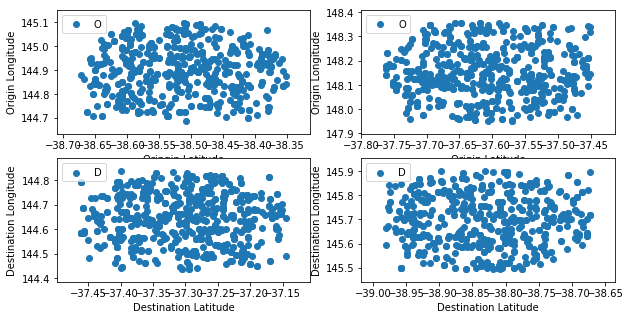

In [24]:
# Plotting the latitude vs longitude based on each region 
fig = plt.figure(1)
temp1 = Drone_data[Drone_data['Origin Region']==1.0]
plt.subplot(2,2,1)
plt.scatter(temp1['Origin Latitude'],temp1['Origin Longitude'])
plt.xlabel('Oringin Latitude')
plt.ylabel('Origin Longitude')
plt.legend('Oigin region')

temp1 = Drone_data[Drone_data['Origin Region']==12.0]
plt.subplot(2,2,2)
plt.scatter(temp1['Origin Latitude'],temp1['Origin Longitude'])
plt.xlabel('Origin Latitude')
plt.ylabel('Origin Longitude')
plt.legend('Origin region')

temp1 = Drone_data[Drone_data['Destination Region']==5.0]
plt.subplot(2,2,3)
plt.scatter(temp1['Destination Latitude'],temp1['Destination Longitude'])
plt.xlabel('Destination Latitude')
plt.ylabel('Destination Longitude')
plt.legend('Destination region')

temp1 = Drone_data[Drone_data['Destination Region']==34.0]
plt.subplot(2,2,4)
plt.scatter(temp1['Destination Latitude'],temp1['Destination Longitude'])
plt.xlabel('Destination Latitude')
plt.ylabel('Destination Longitude')
plt.legend('Destination region')
fig.set_figheight(5)
fig.set_figwidth(10)


plt.show()

# 3.3 Semantic errors in Departure Time and Delivery Time

There are some errors in Departure Time and Delivery Time. To overcome those erros I created below algorithm with takes Travel time as a reference and finds errors in Depature Time.

Below algorithm clears two errors those are:

 * In some rows Delivery Time and Departure Time are swapped which give us worng time difference
 * In some case Travel Time is wrong in such cases, Delivery time and Departure time difference is correct
 

In [25]:
# Defined timecal function to find and remove the errors
def timecal(t1,t2,f):
    time_split = t1.split(':')
    time_split1 = t2.split(':')  
    if int(time_split[0]) > int(time_split1[0]) :
        if len(str(int(time_split[0])))!= 1 & len(str(int(time_split1[0])))!= 1:
            t1_secs = int(time_split[0])*3600+int(time_split[1])*60+int(time_split[2])
            t2_secs = int(time_split1[0])*3600+int(time_split1[1])*60+int(time_split1[2])
            T = round((t2_secs - t1_secs)/60.0,2)
        elif len(str(int(time_split[0])))!= 1 & len(str(int(time_split1[0])))== 1: 
            t1_secs = int(time_split[0])*3600+int(time_split[1])*60+int(time_split[2])
            t2_secs = (int(time_split1[0])+24)*3600+int(time_split1[1])*60+int(time_split1[2])
            T = round((t2_secs - t1_secs)/60.0,2)
            if T < 0 or T > 547:
                t1_secs = int(time_split[0])*3600+int(time_split[1])*60+int(time_split[2])
                t2_secs = (int(time_split1[0]))*3600+int(time_split1[1])*60+int(time_split1[2])
                T = round((t1_secs-t2_secs)/60.0,2)
        elif len(str(int(time_split[0])))== 1 & len(str(int(time_split1[0])))!= 1:
            t1_secs = (int(time_split[0])+24)*3600+int(time_split[1])*60+int(time_split[2])
            t2_secs = int(time_split1[0])*3600+int(time_split1[1])*60+int(time_split1[2])
            T = round((t2_secs - t1_secs)/60.0,2)
            print(T)
            if T > 547:
                T = round((t1_secs - t2_secs)/60.0,2)
        else:
            t1_secs = (int(time_split[0])+24)*3600+int(time_split[1])*60+int(time_split[2])
            t2_secs = (int(time_split1[0])+24)*3600+int(time_split1[1])*60+int(time_split1[2])
            T = round((t2_secs - t1_secs)/60.0,2)
        if pd.notnull(f):
            if int(T)==int(f):
                return (':').join(time_split)+'/'+(':').join(time_split1)
            else:
                if T >0:
                    return (':').join(time_split)+'/'+(':').join(time_split1)
                else:
                    T = round((t1_secs - t2_secs)/60.0,2)
                    if int(T)==int(f):
                        return (':').join(time_split1)+'/'+(':').join(time_split)
        else:
            return (':').join(time_split)+'/'+(':').join(time_split1)
    else:
        if len(str(int(time_split[0])))== 1 and len(str(int(time_split1[0])))!= 1:
            t1_secs = (int(time_split[0])+24)*3600+int(time_split[1])*60+int(time_split[2])
            t2_secs = int(time_split1[0])*3600+int(time_split1[1])*60+int(time_split1[2])
            T = round((t1_secs - t2_secs)/60.0,2)
            if T > 547:
                t1_secs = int(time_split[0])*3600+int(time_split[1])*60+int(time_split[2])
                t2_secs = int(time_split1[0])*3600+int(time_split1[1])*60+int(time_split1[2])
                T=  round((t2_secs - t1_secs)/60.0,2)
        else:
            t1_secs = int(time_split[0])*3600+int(time_split[1])*60+int(time_split[2])
            t2_secs = int(time_split1[0])*3600+int(time_split1[1])*60+int(time_split1[2])
            T = round((t2_secs - t1_secs)/60.0,2)
        if pd.notnull(f):
            if int(T)==int(f):
                #print((':').join(time_split)+'/'+(':').join(time_split1)+'/'+str(T)+'/'+str(f))
                return (':').join(time_split)+'/'+(':').join(time_split1)
            else:
                if T > 0 and T < 547:
                    return (':').join(time_split)+'/'+(':').join(time_split1)
                else:
                    T = round((t1_secs - t2_secs)/60.0,2)
                    if int(T)==int(f):
                        return (':').join(time_split1)+'/'+(':').join(time_split)
        else:
            return (':').join(time_split1)+'/'+(':').join(time_split)

# Created new T_time column in dataframe
Drone_data['T_time'] = Drone_data.apply(lambda x: timecal(x['Departure Time'], x['Delivery Time'],pd.to_numeric(x['Travel Time'])), axis=1)

# Changing the Departure Time for T_time column
Drone_data['Departure Time'] = Drone_data['T_time'].apply(lambda x : x.split('/')[0].strip())
# Changing the Delivery Time for T_time column
Drone_data['Delivery Time'] = Drone_data['T_time'].apply(lambda x : x.split('/')[1].strip())
# droping the T-time
Drone_data = Drone_data.drop(columns=['T_time'])

## 3.4 Semantic Errors in Journey Distance

From the given latitude and longitude we can find the journey distance and impute those values. Since I'm not sure about the Journey Distance given in the dataframe 

In [26]:
# Importing required function from math
from math import sin, cos, sqrt, atan2, radians
# Defined distancefinder to find the distance
def distancefinder(l1,lo1,l2,lo2):
    # Given radius of earth in km
    R = 6378.0
    for i in range(0,len(Drone_data)):
        Origin_lat = radians(l1)
        Origin_lon = radians(lo1)
        Dest_lat = radians(l2)
        Dest_lon = radians(lo2)

        dist_lon = Dest_lon - Origin_lon
        dist_lat = Dest_lat - Origin_lat

        a = sin(dist_lat / 2)**2 + cos(Origin_lat) * cos(Dest_lat) * sin(dist_lon/2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        return R * c
    
# Journey Distnace now holds claculated distance using distancefinder function
Drone_data['Journey Distance'] = Drone_data.apply(lambda x : distancefinder(x['Origin Latitude'], x['Origin Longitude'],
                                                                            x['Destination Latitude'],x['Destination Longitude']), axis=1)

# 4. Missing values and Outliers

## 4.1 Finding Drone Speeds

Finding Travel time is hectic task, As I can't relay on the departue time and delivery time since there might be some errors in them. The best approach is to find the Drone speeds and use them to find the Travel time.

So, below code gives landing and takeoff speed and on_route speed.

Here is the equation to find the Travel time:
 $$distnace=\frac{(5x+5y+(Traveltime-10)z)}{60}$$
 
Where x is take_off speed
      y is landing speed
      z is on_route speed

In [27]:
# Import math
import random

# finding on-route speed
on_route = []
for i in list(pd.unique(Drone_data[pd.notnull(Drone_data['Drone Type'])]['Drone Type'])):
    on_speed = []
    temp_df = Drone_data[Drone_data['Drone Type']==i].reset_index()
    for j in range(0,5):
        eq1 = random.randrange(0,len(temp_df) , 1)
        eq2 = random.randrange(0,len(temp_df) , 1)
        if eq1 != eq2:
            numer = float(abs(temp_df.loc[eq1,['Journey Distance']]-temp_df.loc[eq2,['Journey Distance']]))
            denom = float(abs((temp_df.loc[eq1,['Travel Time']]-temp_df.loc[eq2,['Travel Time']])/60))
            route_speed = numer/denom
            on_speed.append(route_speed)
    on_route.append(sum(on_speed)/len(on_speed))

Drone_type = list(pd.unique(Drone_data[pd.notnull(Drone_data['Drone Type'])]['Drone Type']))
speeds = pd.DataFrame(on_route,Drone_type).reset_index().rename(columns={'index':'Drone Type',0:'on_route'})

# finding landing and takeoff speed
land_take = []
for i in list(pd.unique(Drone_data[pd.notnull(Drone_data['Drone Type'])]['Drone Type'])):
    lan_take_speed = []
    temp_df = Drone_data[Drone_data['Drone Type']==i].reset_index()
    for j in range(0,5):
        eq1 = random.randrange(0,len(temp_df) , 1)
        speed = float(abs(12*(temp_df.loc[eq1,['Journey Distance']]-((float(temp_df.loc[eq1,['Travel Time']])-10)*float(speeds[speeds['Drone Type']==i]['on_route']))/60)))
        lan_take_speed.append(speed)
    land_take.append(sum(lan_take_speed)/len(lan_take_speed))
lan_series = pd.Series(land_take)

speeds = pd.concat([speeds,lan_series],axis=1).rename(columns={0:'landing and takeoff'})
# speeds are stored in datframe
speeds.sort_values('Drone Type')

,Drone Type,on_route,landing and takeoff
0,1.0,61.000925,36.952792
1,2.0,64.000494,38.984826
2,3.0,78.003021,44.889007


# 4.2 Filling missing values of Drone Type 
Using the Drone speeds we can find the drone type.

In [28]:
# created Dronefinder 
def Dronefinder(jd,Tt,Dt,tm):
    Drone_list = [1.0,2.0,3.0]
    Drone_on_speed = [61.000457,64.013976,77.999420]
    Drone_lt_speed = [36.980867,38.379230,45.039933]
    diff_list = []
    diff_lt_list = []
    if pd.notnull(Tt):
        for i in Drone_lt_speed:
            on_speed = (jd*60-(5*i))/(Tt-10)
            diff = abs(Drone_on_speed[Drone_lt_speed.index(i)]-on_speed)
            diff_list.append(diff)
        for i in Drone_on_speed:
            lt_speed = (jd*60-(Tt-10)*i)/5
            diff_lt = abs(Drone_lt_speed[Drone_on_speed.index(i)]-lt_speed)
            diff_lt_list.append(diff_lt)
        
        if Drone_list[diff_list.index(min(diff_list))] != Dt:
            if Drone_list[diff_list.index(min(diff_list))]==3.0:
                if round(diff_lt,0) != 0:
                    return Dt
        
        if Drone_list[diff_list.index(min(diff_list))] == Drone_list[diff_lt_list.index(min(diff_lt_list))]:
            return Drone_list[diff_list.index(min(diff_list))]
    else:
        return Dt
        
Drone_data['Drone_Type'] = Drone_data.apply(lambda x: Dronefinder(x['Journey Distance'],x['Travel Time'],x['Drone Type'],x),axis=1)
          

In [29]:
# crosstab to check whether outliers in drone type are removed or not
pd.crosstab(Drone_data["Drone Type"], Drone_data["Drone_Type"])

Drone_Type,1.0,2.0,3.0
Drone Type,,,
1.0,18668,13,8
2.0,23,11358,11
3.0,0,0,7412


# 4.3 Filling missing values in Travel Time
We always have to fill travel time missing after filling missing values in Drone Type. since Travel time depends on Drone type. 

In [ ]:
# Defined Travel_timefinder to find travel time 
def Travel_timefinder(Dt,Jd):
    Drone_list = [1.0,2.0,3.0]
    Drone_on_speed = [61.000457,64.013976,77.999420]
    Drone_lt_speed = [36.980867,38.379230,45.039933]
    num = float(Jd)-((float(Drone_lt_speed[Drone_list.index(Dt)]))/12)
    total = 10+(num/(float(Drone_on_speed[Drone_list.index(Dt)])/60))
    return round(total,2)
Drone_data['Travel Time'] = Drone_data.apply(lambda x: Travel_timefinder(x['Drone_Type'],x['Journey Distance']),axis=1)

def Dronetypecolumnreplacer(Dt):
    return Dt

Drone_data['Drone Type'] = Drone_data.apply(lambda x : Dronetypecolumnreplacer(x['Drone_Type']),axis=1)
# Removing Drone_Type since Drone Type holds all values
Drone_data = Drone_data.drop(columns=['Drone_Type'])

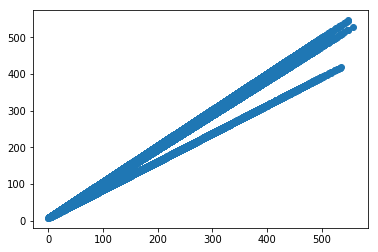

In [31]:
plt.scatter(Drone_data['Journey Distance'],Drone_data['Travel Time'])
plt.show()

Above Graph, shows no outliers in the Travel time

## 4.4.1 Creating Dictionary of region for filling missing values

Since, region has missing values have missing values to fill them I created a dictionary which have region as key and latitude and logitudes has it's values.

In [32]:
# temp_df is created which has origin data
temp_df = Drone_data[pd.notnull(Drone_data['Origin Region'])&pd.notnull(Drone_data['Origin Latitude'])&pd.notnull(Drone_data['Origin Longitude'])].reset_index()

# dictionary is created
loca = {}
for i in range(0,len(temp_df)):
    if temp_df.loc[i,'Origin Region'] not in loca.keys():
        loca[temp_df.loc[i,'Origin Region']] = [str(temp_df.loc[i,'Origin Latitude'])+'/'+str(temp_df.loc[i,'Origin Longitude'])]
    else:
        loca[temp_df.loc[i,'Origin Region']].append(str(temp_df.loc[i,'Origin Latitude'])+'/'+str(temp_df.loc[i,'Origin Longitude']))
# temp_df is created which has destination data
temp_df = Drone_data[pd.notnull(Drone_data['Destination Region'])&pd.notnull(Drone_data['Destination Latitude'])&pd.notnull(Drone_data['Destination Longitude'])].reset_index()

# loca desctionary has all the value
for i in range(0,len(temp_df)):
    if temp_df.loc[i,'Destination Region'] not in loca.keys():
        loca[temp_df.loc[i,'Destination Region']] = [str(temp_df.loc[i,'Destination Latitude'])+'/'+str(temp_df.loc[i,'Destination Longitude'])]
    else:
        loca[temp_df.loc[i,'Destination Region']].append(str(temp_df.loc[i,'Destination Latitude'])+'/'+str(temp_df.loc[i,'Destination Longitude']))

## 4.4.2 Origin  Region Missing values imputation
imputing region values using the loca dictionary created above

In [33]:
temp_df = Drone_data[pd.isnull(Drone_data['Origin Region'])][['Origin Latitude','Origin Longitude']].reset_index()

loc_list = []
for i in range(0,len(temp_df)):
    loc_list.append(str(temp_df.loc[i,'Origin Latitude'])+'/'+str(temp_df.loc[i,'Origin Longitude']))

k  = []
for i in loc_list:
    for j in loca.keys():
        flag = 0
        if i in loca[j]:
            flag = 1
            value = j
            break
    if flag == 1:
        k.append(value)
    else:
        k.append('NaN')
loc = pd.Series(k)
temp_df['Region'] = loc

for i in range(0,len(temp_df)):
    if temp_df.loc[i,'Region']!='NaN':
        Drone_data.loc[temp_df.loc[i,'index'],'Origin Region'] = float(temp_df.loc[i,['Region']])

## 4.4.3 Destination region Missing values imputation
Imputing Destination regions using loca dictionary created above

In [34]:
temp_df = Drone_data[pd.isnull(Drone_data['Destination Region'])][['Destination Latitude','Destination Longitude']].reset_index()

loc_list = []
for i in range(0,len(temp_df)):
    loc_list.append(str(temp_df.loc[i,'Destination Latitude'])+'/'+str(temp_df.loc[i,'Destination Longitude']))

k  = []
for i in loc_list:
    for j in loca.keys():
        flag = 0
        if i in loca[j]:
            flag = 1
            value = j
            break
    if flag == 1:
        k.append(value)
    else:
        k.append('NaN')
loc = pd.Series(k)
temp_df['Region'] = loc

for i in range(0,len(temp_df)):
    if temp_df.loc[i,'Region']!='NaN':
        Drone_data.loc[temp_df.loc[i,'index'],'Destination Region'] = float(temp_df.loc[i,['Region']])

## 4.4.4 Filling the left NaN values in Origin region and Destination Region

The left out nan vales in Origin and destination is done by using the Navie Bayes Classfier which is quite effective in classifying the values

In [35]:
# NaN value dataframe of origin region and destination region
Origin_Nan = Drone_data[pd.isnull(Drone_data['Origin Region'])][['Origin Latitude','Origin Longitude']]
Destination_Nan = Drone_data[pd.isnull(Drone_data['Destination Region'])][['Destination Latitude','Destination Longitude']]
print(Destination_Nan)
# creating the train data from both Origin and Destination region and their coordinates
origin_df = Drone_data[pd.notnull(Drone_data['Origin Region'])][['Origin Region','Origin Latitude','Origin Longitude']].reset_index().drop(columns=['index'])
dest_df = Drone_data[pd.notnull(Drone_data['Destination Region'])][['Destination Region','Destination Latitude','Destination Longitude']].reset_index().drop(columns=['index'])
dest_df = dest_df.rename(columns = {'Destination Region':'Origin Region','Destination Latitude':'Origin Latitude','Destination Longitude':'Origin Longitude'})


origin_X = origin_df[['Origin Latitude','Origin Longitude']]
origin_Y = origin_df['Origin Region']
train_X = pd.concat([origin_X,dest_df[['Origin Latitude','Origin Longitude']]]).reset_index().drop(columns=['index'])
train_Y = pd.concat([origin_Y,dest_df['Origin Region']]).reset_index().drop(columns=['index'])


       Destination Latitude  Destination Longitude
4144             -37.724657             143.628840
16430            -37.221258             145.329428
21355            -38.608902             146.201006
24887            -37.949679             146.621775
35891            -36.718394             147.562438


## 4.4.5 Navie Bayes algorithm to predict the Region
The left out nan vales in Origin and destination is done by using the Navie Bayes Classfier which is quite effective in classifying the values

In [36]:

gnb = GaussianNB()

Navie_model = gnb.fit(train_X, train_Y)
origin_region=Navie_model.predict(Origin_Nan)
nan_index =  Drone_data[pd.isnull(Drone_data['Origin Region'])]['Origin Region'].reset_index()
for i in range(0,len(nan_index)):
    Drone_data.loc[nan_index.loc[i,'index'],'Origin Region'] = float(origin_region[i])
    

dest_region = Navie_model.predict(Destination_Nan)
nan_index = Drone_data[pd.isnull(Drone_data['Destination Region'])]['Destination Region'].reset_index()
for i in range(0,len(nan_index)):
    Drone_data.loc[nan_index.loc[i,'index'],'Destination Region'] = float(dest_region[i])

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 4.5 Removing missing values in Id's column

Id has missing values which can be overcomed with any algorithm or any relation. But, has some repeating values which implies there are sime dulicates in the data


In [37]:
Drone_data['Id'].describe()

count            37479
unique           37443
top       ID1845177614
freq                 2
Name: Id, dtype: object

In [38]:
Drone_data.drop_duplicates(subset=['Package Weight','Departure Date','Departure Date','Post Type','Origin Region','Destination Region'], keep='first', inplace=True)

Using above command I complete remove all duplicate rows in the dataframe.

In [39]:
Drone_data['Id'].describe()

count            37443
unique           37443
top       ID1912206640
freq                 1
Name: Id, dtype: object

It's Suprising that, all nan values disappear which means all nan rows are duplicates that are removed in the process of cleaning the data.

In [40]:
Drone_data[pd.isnull(Drone_data['Id'])]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare


## 4.6 Removing missing values in Post Type

I found that Post Type is somehow interlinked with the Id row since

when: 
     Id has ID followed by '5' the Post Type is 1.0
     
     Id has ID followed by '1' the post Type is 0.0
     
Using this information i imputed all the nan values in post type


In [41]:
def posttypeformatter(s):
    postidentifier = re.findall(r'ID(\d{1}).*',s)
    if postidentifier[0] == '1':
        return 0.0
    elif postidentifier[0] == '5':
        return 1.0
    else :
        return None
Drone_data['Post Type'] = Drone_data['Id'].apply(lambda x: posttypeformatter(x))

## 4.7  Removing missing values in Delivery Fare

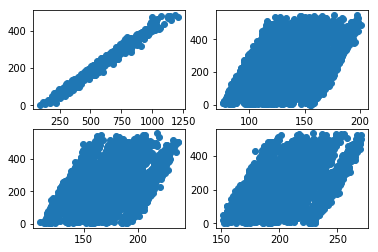

In [42]:
fig = plt.figure()
plt.subplot(2,2,1)
tem1_df = Drone_data[Drone_data['Package Weight']>40]
plt.scatter(tem1_df['Delivery Fare'],tem1_df['Journey Distance'])
plt.subplot(2,2,2)
tem2_df = Drone_data[(Drone_data['Package Weight']<40)&(Drone_data['Drone Type']==1.0) ]
plt.scatter(tem2_df['Delivery Fare'],tem2_df['Journey Distance'])
plt.subplot(2,2,3)
tem2_df = Drone_data[(Drone_data['Package Weight']<40)&(Drone_data['Drone Type']==2.0) ]
plt.scatter(tem2_df['Delivery Fare'],tem2_df['Journey Distance'])
plt.subplot(2,2,4)
tem2_df = Drone_data[(Drone_data['Package Weight']<40)&(Drone_data['Drone Type']==3.0) ]
plt.scatter(tem2_df['Delivery Fare'],tem2_df['Journey Distance'])
plt.show()

From the above graph, I strongly believe that delivery fare is in relation with Drone Type, Package weight and Journey Distance.
So, I built linear regression using that data.

I also found the correlation among above mentioned parameters from the correlation matrix created above.

In [43]:
from sklearn.linear_model import LinearRegression

temp = Drone_data[pd.notnull(Drone_data['Delivery Fare'])]
reg = LinearRegression().fit(temp[['Drone Type','Package Weight','Journey Distance']],temp['Delivery Fare'])
reg

Nan_df = Drone_data[pd.isnull(Drone_data['Delivery Fare'])].reset_index()
Fare_predict = reg.predict(Nan_df[['Drone Type','Package Weight','Journey Distance']])

for i in range(0,len(Nan_df)):
    Drone_data.loc[Nan_df.loc[i,'index'],['Delivery Fare']] = Fare_predict[i]

## 4.7.1 cross checking Delievery Fare imputation 

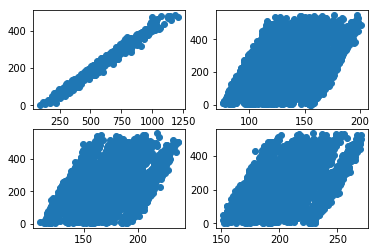

In [44]:
fig = plt.figure()
plt.subplot(2,2,1)
tem1_df = Drone_data[Drone_data['Package Weight']>40]
plt.scatter(tem1_df['Delivery Fare'],tem1_df['Journey Distance'])
plt.subplot(2,2,2)
tem2_df = Drone_data[(Drone_data['Package Weight']<40)&(Drone_data['Drone Type']==1.0) ]
plt.scatter(tem2_df['Delivery Fare'],tem2_df['Journey Distance'])
plt.subplot(2,2,3)
tem2_df = Drone_data[(Drone_data['Package Weight']<40)&(Drone_data['Drone Type']==2.0) ]
plt.scatter(tem2_df['Delivery Fare'],tem2_df['Journey Distance'])
plt.subplot(2,2,4)
tem2_df = Drone_data[(Drone_data['Package Weight']<40)&(Drone_data['Drone Type']==3.0) ]
plt.scatter(tem2_df['Delivery Fare'],tem2_df['Journey Distance'])
plt.show()

There is so change in plots. Hence My linear model is accurate in predicting the Delivery Fare

# 5. Finally Data is clean

Hence, data is clean without any errors I'm writing dataframe to the file 

In [45]:
Drone_data.to_csv('29424143_solution.csv', encoding='utf-8', index=False)